# Home insurance quote conversion

In this Notebook we are going to take a first look at the data for the Kaggle competition on home insurance quote conversion: https://www.kaggle.com/c/homesite-quote-conversion

A related competition on Kaggle is the Springleaf competition: 
https://www.kaggle.com/c/springleaf-marketing-response

For the home insurance quote conversion task we have two files: `train.csv.zip` and `test.csv.zip`

In [7]:
import sys
import gzip

path_train = '../data/train.csv.gz'
path_test = '../data/test.csv.gz'

with gzip.open(path_train, 'r') as f:
    counter = 0
    for i, l in enumerate(f):
        if i < 10:
            print(l)
        else:
            break        

b'"QuoteNumber","Original_Quote_Date","QuoteConversion_Flag","Field6","Field7","Field8","Field9","Field10","Field11","Field12","CoverageField1A","CoverageField1B","CoverageField2A","CoverageField2B","CoverageField3A","CoverageField3B","CoverageField4A","CoverageField4B","CoverageField5A","CoverageField5B","CoverageField6A","CoverageField6B","CoverageField8","CoverageField9","CoverageField11A","CoverageField11B","SalesField1A","SalesField1B","SalesField2A","SalesField2B","SalesField3","SalesField4","SalesField5","SalesField6","SalesField7","SalesField8","SalesField9","SalesField10","SalesField11","SalesField12","SalesField13","SalesField14","SalesField15","PersonalField1","PersonalField2","PersonalField4A","PersonalField4B","PersonalField5","PersonalField6","PersonalField7","PersonalField8","PersonalField9","PersonalField10A","PersonalField10B","PersonalField11","PersonalField12","PersonalField13","PersonalField14","PersonalField15","PersonalField16","PersonalField17","PersonalField18",

So what do we have. Quote number and date are there, as well as the conversion flag that tells us whether or not the customer accepted the offer. After that:
 - about seven "Fields"
 - about seventeen "CoverageFields"
 - about seventeen "Salesfields": these might contain sales actions associated with this customer, who knows?
 - dozens of "PersonalFields": these might contain personal features engineered around the customer.
 - dozens of "PropertyFields"
 - dozens of "GeographicFields"

Getting a high score does not require a lot of Python code at all, see e.g., https://www.kaggle.com/mpearmain/homesite-quote-conversion/xgboost-benchmark

Here, we'll take a bit more descriptive-first approach, to look at the data a bit. But we'll use bits from the above srcipt. The first thing to notice is the use of panda. That's interesting: http://pandas.pydata.org

In [9]:
import pandas as pd

In [71]:
train_data = pd.read_csv(path_train, encoding='latin1', 
                         parse_dates=['Original_Quote_Date'], 
                         dayfirst=False)
test_data = pd.read_csv(path_test, encoding='latin1',
                       parse_dates=['Original_Quote_Date'],
                       dayfirst=False)

Did you see that? pandas.read_csv apparently has no trouble reading in a gzipped file. It automatically detects this, no less.

In [51]:
train_data


,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL
5,12,2014-01-18,0,E,14,0.9472,0.0006,"1,487",1.3045,N,...,10,11,-1,23,-1,25,-1,14,N,IL
6,13,2013-11-01,0,J,23,0.9258,0.0004,"1,165",1.2665,N,...,18,22,-1,19,-1,13,-1,8,N,TX
7,14,2014-05-14,0,B,25,0.9153,0.0007,935,1.0200,N,...,6,5,-1,3,-1,12,-1,13,N,CA
8,18,2013-06-19,0,J,10,0.9691,0.0004,"1,165",1.2665,N,...,2,1,-1,3,-1,2,-1,13,N,TX
9,19,2013-06-18,0,F,11,0.9919,0.0038,564,1.1886,N,...,10,11,-1,9,-1,22,-1,18,N,NJ


Look how beautiful that output is.

So now we see that we have 260K data points in here, and almost 300 features. Each data point consists of a quote that was done; it may be possible that several quotes have been offered to the same customer for all we know. The last feature, `GeographicField64`, should be the state code, I would guess. For most of the features, we have no idea what they encode. That means that after doing this whole exercise we still have no idea how to engineer good features for this task. This knowledge apparently resides with the Home Insurance agency which came to Kaggle with the data for this competition. But we can take a look at some of the features in the data. Some may be dates, and we can plot their time series. Others may be geographical locations, which we may plot on a map.

What have others done to dig into this data? 
https://www.kaggle.com/skylord/homesite-quote-conversion/digging-deeper-and-deeper/notebook
digs into the data and tries to plot features. The script is based on a template that was also used in the Springleaf competition that I linked to above. Let's try and do something similar in Python. First, check what we have in the pandas object that read_csv returned.

In [52]:
train_data.dtypes

QuoteNumber                      int64
Original_Quote_Date     datetime64[ns]
QuoteConversion_Flag             int64
Field6                          object
Field7                           int64
Field8                         float64
Field9                         float64
Field10                         object
Field11                        float64
Field12                         object
CoverageField1A                  int64
CoverageField1B                  int64
CoverageField2A                  int64
CoverageField2B                  int64
CoverageField3A                  int64
CoverageField3B                  int64
CoverageField4A                  int64
CoverageField4B                  int64
CoverageField5A                  int64
CoverageField5B                  int64
CoverageField6A                  int64
CoverageField6B                  int64
CoverageField8                  object
CoverageField9                  object
CoverageField11A                 int64
CoverageField11B         

So we have many integer type columns, some floats, and some objects.

In [53]:
type(train_data.dtypes)

pandas.core.series.Series

In [54]:
train_data.get_dtype_counts()


datetime64[ns]      1
float64             6
int64             265
object             27
dtype: int64

Okay so, we have 6 floats, 265 integers, and 28 objects

What are the float fields?

In [24]:
dtypes = train_data.dtypes

In [26]:
dtypes.axes

[Index(['QuoteNumber', 'Original_Quote_Date', 'QuoteConversion_Flag', 'Field6',
        'Field7', 'Field8', 'Field9', 'Field10', 'Field11', 'Field12', 
        ...
        'GeographicField59A', 'GeographicField59B', 'GeographicField60A',
        'GeographicField60B', 'GeographicField61A', 'GeographicField61B',
        'GeographicField62A', 'GeographicField62B', 'GeographicField63',
        'GeographicField64'],
       dtype='object', length=299)]

In [27]:
dtypes.size

299

In [28]:
dtypes.shape

(299,)

In [29]:
dtypes.values

array([dtype('int64'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('float64'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('O'), dtype('O'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('in

In [55]:
dtypes[dtypes == 'float64']

Field8             float64
Field9             float64
Field11            float64
PersonalField84    float64
PropertyField25    float64
PropertyField29    float64
dtype: object

In [56]:
dtypes[dtypes == 'object']

Original_Quote_Date    object
Field6                 object
Field10                object
Field12                object
CoverageField8         object
CoverageField9         object
SalesField7            object
PersonalField7         object
PersonalField16        object
PersonalField17        object
PersonalField18        object
PersonalField19        object
PropertyField3         object
PropertyField4         object
PropertyField5         object
PropertyField7         object
PropertyField14        object
PropertyField28        object
PropertyField30        object
PropertyField31        object
PropertyField32        object
PropertyField33        object
PropertyField34        object
PropertyField36        object
PropertyField37        object
PropertyField38        object
GeographicField63      object
GeographicField64      object
dtype: object

In [57]:
train_data['Original_Quote_Date']

0        2013-08-16
1        2014-04-22
2        2014-08-25
3        2013-04-15
4        2014-01-25
5        2014-01-18
6        2013-11-01
7        2014-05-14
8        2013-06-19
9        2013-06-18
10       2013-09-24
11       2013-06-11
12       2013-10-22
13       2013-08-20
14       2015-02-24
15       2014-10-27
16       2015-02-06
17       2013-10-02
18       2014-09-15
19       2013-06-18
20       2014-03-18
21       2014-10-15
22       2014-04-03
23       2015-03-31
24       2013-05-30
25       2015-03-30
26       2013-09-17
27       2015-03-07
28       2013-06-06
29       2013-01-22
            ...    
260723   2015-01-07
260724   2015-04-11
260725   2014-01-20
260726   2014-05-14
260727   2015-03-31
260728   2013-10-02
260729   2015-02-18
260730   2013-11-09
260731   2014-07-20
260732   2015-04-01
260733   2014-02-04
260734   2014-01-21
260735   2013-04-21
260736   2013-07-01
260737   2014-03-10
260738   2014-04-11
260739   2014-01-24
260740   2013-08-22
260741   2013-02-05


In [41]:
train_data.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9, 
            ...
            260743, 260744, 260745, 260746, 260747, 260748, 260749, 260750,
            260751, 260752],
           dtype='int64', length=260753)

In [69]:
import matplotlib.pyplot as plt

In [43]:
%matplotlib inline

In [44]:
train_data['Original_Quote_Date'].is_time_series

False

In [46]:
!wc -l '../data/train.csv.gz'

  180040 ../data/train.csv.gz


In [47]:
train_data['Original_Quote_Date'].value_counts

<bound method Series.value_counts of 0         2013-08-16
1         2014-04-22
2         2014-08-25
3         2013-04-15
4         2014-01-25
5         2014-01-18
6         2013-11-01
7         2014-05-14
8         2013-06-19
9         2013-06-18
10        2013-09-24
11        2013-06-11
12        2013-10-22
13        2013-08-20
14        2015-02-24
15        2014-10-27
16        2015-02-06
17        2013-10-02
18        2014-09-15
19        2013-06-18
20        2014-03-18
21        2014-10-15
22        2014-04-03
23        2015-03-31
24        2013-05-30
25        2015-03-30
26        2013-09-17
27        2015-03-07
28        2013-06-06
29        2013-01-22
             ...    
260723    2015-01-07
260724    2015-04-11
260725    2014-01-20
260726    2014-05-14
260727    2015-03-31
260728    2013-10-02
260729    2015-02-18
260730    2013-11-09
260731    2014-07-20
260732    2015-04-01
260733    2014-02-04
260734    2014-01-21
260735    2013-04-21
260736    2013-07-01
260737    2014-03-

In [64]:
quotes_per_day = train_data.groupby('Original_Quote_Date').size()

In [65]:
len(quotes_per_day)

868

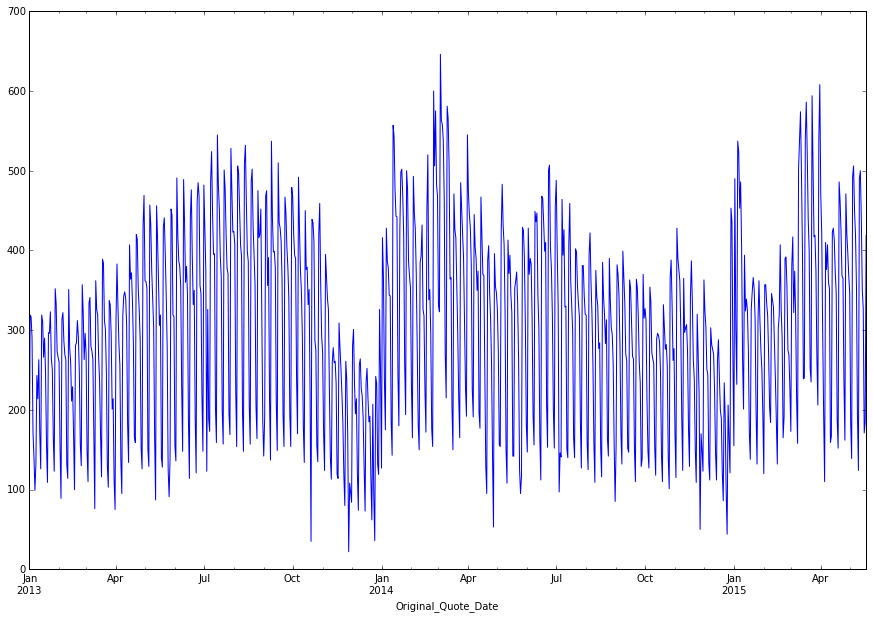

In [70]:
plt.figure(figsize = (15, 10))
quotes_per_day.plot()

So we see about thirteen wild oscillations in three months, those probably correspond to weekend days vs week days, as this is the amount of weeks in a three month period. Funnily enough the number of quotes is almost never zero. So even in the weekends, even just before Christmas, these people are busy offering quotes to their customers.

Okay, so we learned a bit about using `pandas`, though there is much more this module can do.

Next, let's add a couple of features, namely 'Year', 'Month', and 'Weekday', just like that which is done in the abovementioned script.

In [72]:
train_data.columns

Index(['QuoteNumber', 'Original_Quote_Date', 'QuoteConversion_Flag', 'Field6',
       'Field7', 'Field8', 'Field9', 'Field10', 'Field11', 'Field12', 
       ...
       'GeographicField59A', 'GeographicField59B', 'GeographicField60A',
       'GeographicField60B', 'GeographicField61A', 'GeographicField61B',
       'GeographicField62A', 'GeographicField62B', 'GeographicField63',
       'GeographicField64'],
      dtype='object', length=299)

In [73]:
test_data.columns

Index(['QuoteNumber', 'Original_Quote_Date', 'Field6', 'Field7', 'Field8',
       'Field9', 'Field10', 'Field11', 'Field12', 'CoverageField1A', 
       ...
       'GeographicField59A', 'GeographicField59B', 'GeographicField60A',
       'GeographicField60B', 'GeographicField61A', 'GeographicField61B',
       'GeographicField62A', 'GeographicField62B', 'GeographicField63',
       'GeographicField64'],
      dtype='object', length=298)

In [76]:
train_data['Year'] = train_data['Original_Quote_Date'].apply(
    lambda x: int(str(x)[:4]))

In [78]:
train_data['Month'] = train_data['Original_Quote_Date'].apply(
    lambda x: int(str(x)[5:7]))

In [83]:
train_data['Weekday'] = train_data['Original_Quote_Date'].dt.dayofweek

In [85]:
train_data = train_data.drop('Original_Quote_Date', axis=1)

Whatever we do for the training data we should do also for the test data. By the way, for the test data, let's also plot the quotations.

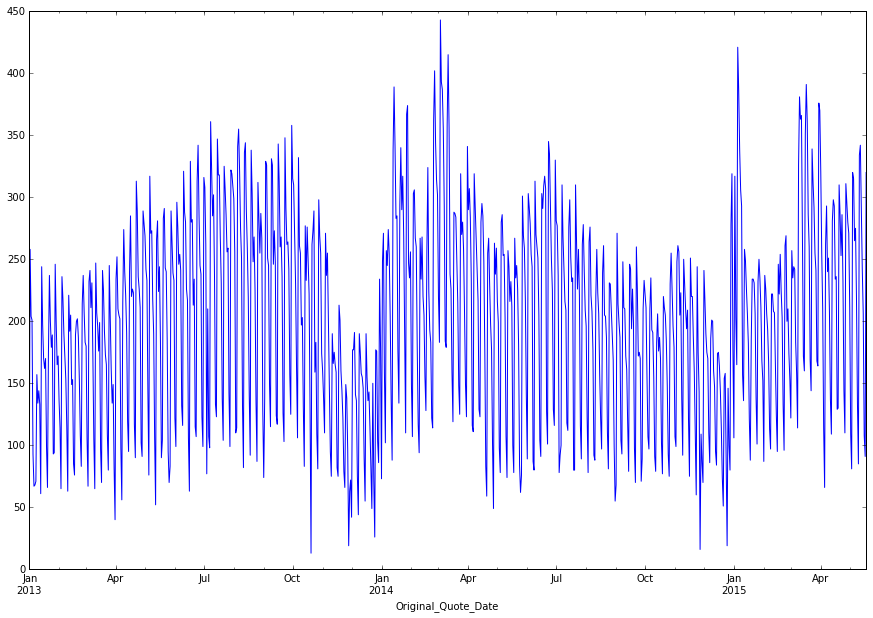

In [89]:
plt.figure(figsize = (15, 10))
test_data.groupby('Original_Quote_Date').size().plot()

So here we can see that the test quotations roughly follow the same temporal pattern as the train quotations. It seems that for each training day, a fixed percentage of quotations was set aside for the test set. One wonders how realistic this setting is. We are given about two years worth of data. With each quotation comes a host of features, probably, hopefully, computed at the time of the quotation. Then we train a model on this data, and we have to predict test points that come from the same two year period of time. Interesting.

In [90]:
test_data['Year'] = test_data['Original_Quote_Date'].apply(
    lambda x: int(str(x)[:4]))

In [91]:
test_data['Month'] = test_data['Original_Quote_Date'].apply(
    lambda x: int(str(x)[5:7]))

In [92]:
test_data['Weekday'] = test_data['Original_Quote_Date'].dt.dayofweek

In [93]:
test_data = test_data.drop('Original_Quote_Date', axis=1)

We still have to remove the quotation number from the train and test matrices, as it is a useless feature.

In [94]:
train_data = train_data.drop('QuoteNumber', axis=1)

In [95]:
test_data = test_data.drop('QuoteNumber', axis=1)

And, remember, the train_data contains one extra attribute: the stuff we have to predict! Let's remove it. It's common notation to denote the vector of predictions `y`.

In [96]:
y = train_data['QuoteConversion_Flag'].values

In [97]:
y


array([0, 0, 0, ..., 0, 0, 0])

In [98]:
train_data = train_data.drop('QuoteConversion_Flag', axis=1)

In [99]:
len(train_data.columns)

299

In [100]:
len(test_data.columns)

299

That looks ok.

Now another thing done here (https://www.kaggle.com/mpearmain/homesite-quote-conversion/xgboost-benchmark/code)
is that NA's are replaced with -1. Now that's a bit strange. Some fields actually do have negative integer values it seems to me, so -1 may have a meaning it should not have in such cases.

In [101]:
train_data = train_data.fillna(-1)

In [102]:
test_data = test_data.fillna(-1)

Then another module is used that I'm unfamiliar with as of yet: `preprocessing`, from scikit_learn. Let's use it here as well.

In [104]:
from sklearn import preprocessing

In [105]:
lbl = preprocessing.LabelEncoder()

In [106]:
lbl

LabelEncoder()

Let's take a look, while we're at it, at what's inside the fields of type object, at the values these fields take.

In [119]:
for c in train_data.columns:
    if train_data[c].dtype == 'object':
        values = list(train_data[c].values) + list(test_data[c].values)
        value_set = set(values)
        print('%s: %s' % (c, ', '.join(['"%s"' % (v,) for v in value_set])))
        lbl.fit(values)
        train_data[c] = lbl.transform(list(train_data[c].values))
        test_data[c] = lbl.transform(list(test_data[c].values))
        

Field6: "F", "A", "K", "B", "E", "D", "J", "C"
Field10: "935", "965", "548", "1,487", "1,113", "1,165", "564", "1,480"
Field12: "Y", "N"
CoverageField8: "X", "U", "T", "Y", "W", "V", "Z"
CoverageField9: "F", "A", "K", "B", "E", "D", "G", "L", "I", "J", "C", "H"
SalesField7: "M", "T", "P", "K", "V", "Q", "R"
PersonalField7: "Y", "N", "-1"
PersonalField16: "XX", "ZL", "ZE", "ZO", "ZV", "ZP", "ZB", "XN", "XQ", "XJ", "ZQ", "XS", "ZN", "ZH", "XV", "XG", "ZC", "YI", "XF", "XE", "ZA", "YH", "XB", "ZR", "XW", "XD", "ZJ", "XP", "YG", "XL", "XH", "YF", "ZK", "ZG", "XM", "XT", "ZS", "XC", "ZT", "ZD", "ZW", "XK", "ZU", "XY", "XI", "XZ", "YE", "ZI", "XU", "XR", "ZF", "XO", "ZM"
PersonalField17: "YJ", "XX", "YK", "ZL", "ZE", "ZV", "ZO", "ZP", "YQ", "XN", "XQ", "YM", "ZB", "XJ", "ZQ", "YN", "XS", "YR", "ZH", "ZN", "XV", "YV", "YP", "XG", "ZC", "YI", "XF", "XE", "ZA", "YH", "XB", "XP", "XW", "XD", "ZR", "ZJ", "YZ", "YG", "XL", "YO", "XH", "YF", "YX", "ZK", "ZG", "XT", "XM", "ZS", "XC", "YS", "ZT", "XK

Well, let's now try and see if we have xgboost installed, probably not with an out of the box conda install:

In [120]:
import xgboost as xgb

ImportError: No module named 'xgboost'

So another time let's figure out how we could do a nice install of xgboost, and how to get it to play nice with conda.